In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../../dados/procucao_gado_MS.csv', sep=';')

In [5]:
df.head(5)

,tipificacao_1,tipificacao_2,tipificacao_3,maturidade,acabamento,peso,classificacao_estabelecimento,outros_incentivos,pratica_recuperacao_pastagem,fertiirrigacao,...,cnt1m_cl_ituinst,cnt3m_cl_ituinst,cnt6m_cl_ituinst,cnt12m_cl_ituinst,ano,categoria,classificacao,longitude,latitude,mes
0,1,0,0,1,3,345.4,26.0,0,0,0,...,0.6129,0.5882,0.5882,0.5882,2017,1,1,-54.36319,-19.92092,2
1,1,0,0,1,3,268.8,26.0,0,0,0,...,0.6129,0.5882,0.5882,0.5882,2017,1,1,-54.36319,-19.92092,2
2,1,0,0,1,3,288.4,26.0,0,0,0,...,0.6129,0.5882,0.5882,0.5882,2017,1,1,-54.36319,-19.92092,2
3,1,0,0,1,3,357.2,26.0,0,0,0,...,0.6129,0.5882,0.5882,0.5882,2017,1,1,-54.36319,-19.92092,2
4,1,0,0,1,3,267.6,26.0,0,0,0,...,0.6129,0.5882,0.5882,0.5882,2017,1,1,-54.36319,-19.92092,2


In [4]:
SEED = 42
y = df['categoria']
X = df.drop(['categoria', 'classificacao'],axis=1)

In [5]:
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

### Cross Validate

In [6]:
# definindo nossas etapas do pipeline
reduzDimPCA = PCA(n_components=30)
scaler = StandardScaler()
rfc_baseline = RandomForestClassifier(random_state=SEED)


In [7]:
# criando o modelo usando pipeline
model= make_pipeline(reduzDimPCA,
                     scaler,
                     rfc_baseline)

In [8]:
# Obtendo scores da validação cruzada com o pipeline criado
scores = cross_val_score(model, X, y, cv=skfolds)
scores

array([0.99425562, 0.99440132, 0.99384977, 0.99426603, 0.99362083,
       0.99431806, 0.99375611, 0.99422441, 0.99402668, 0.99410987])

In [9]:
print('Acurária %.3f +/- %.2f' % (scores.mean(), scores.std()))

Acurária 0.994 +/- 0.00


### Modelo para verificar a características relevantes

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [11]:
rfc = RandomForestClassifier(random_state=SEED)

In [12]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred=rfc.predict(X_test)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9994047495160988


#### Características de maior relevância para o modelo

In [15]:
feature_names = X.columns

In [16]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

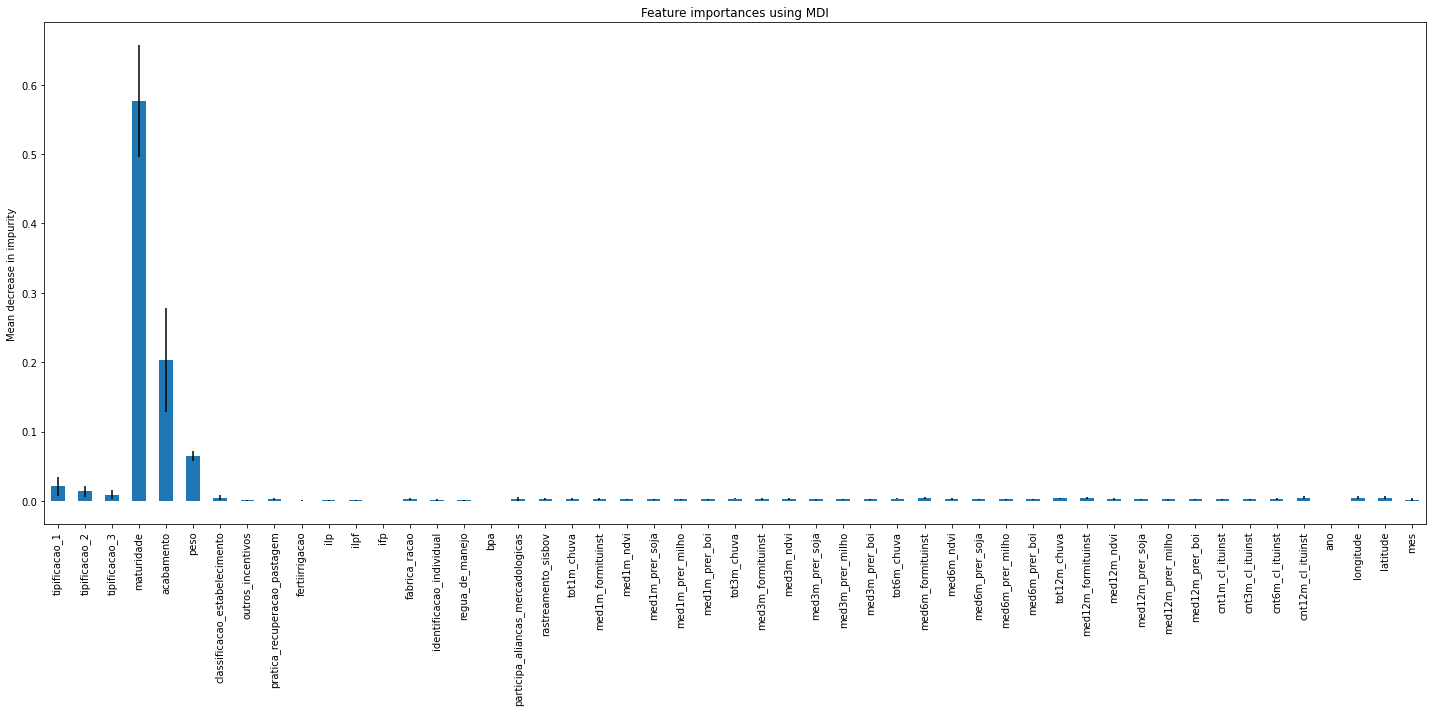

In [17]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(20, 10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Teste retirando a característica Maturidade

In [3]:
SEED = 42
y = df['categoria']
X = df.drop(['categoria', 'classificacao','maturidade'],axis=1)

In [4]:
scaler = StandardScaler()
X = scaler.fit(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

TypeError: Singleton array array(StandardScaler(), dtype=object) cannot be considered a valid collection.

In [20]:
rfc_test = RandomForestClassifier(random_state=SEED)
rfc_test.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred=rfc_test.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9999958374092035


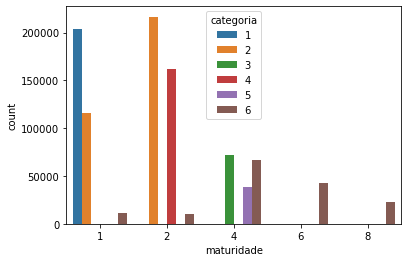

In [5]:
sns.countplot(x="maturidade", hue="categoria", data=df)
plt.show()  

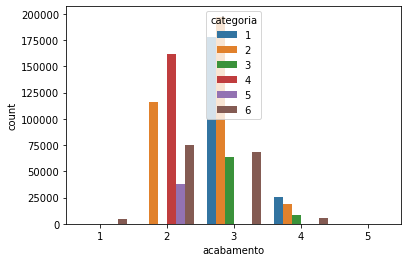

In [7]:
sns.countplot(x="acabamento", hue="categoria", data=df)
plt.show() 